# USING non-LTE TO CALCULATE X_H2_BAR, X_CO_BAR, l_CO_BAR
# l_CO_BAR IS CALCULATED FOR 2 REGIMES: 
#     (1) USING VELOCITY DISPERSION $\Delta v$ FROM THE SIMULATION
#     (2) USING THE $CO$ ISOTHERMAL SOUND SPEED $c_{s, CO}$

In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

In [3]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % r_e)
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [4]:
# declaring constants
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")

In [6]:
X_H2_bar = np.load('outputs/debug_1.6/X_H2_bar_' + run + '_' + out + '.npy')
X_CO_bar = np.load('outputs/debug_1.6/X_CO_bar_' + run + '_' + out + '.npy')
mach_no_arr = np.load('outputs/debug_1.6/mach_no_arr_' + run + '_' + out + '.npy')
n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.6/n_H_mean_arr_' + run + '_' + out + '.npy'),\
                                      "cm**-3")
metal_arr = np.load('outputs/debug_1.6/metal_arr_' + run + '_' + out + '.npy')
temperature = np.load('outputs/debug_1.6/T_' + run + '_' + out + '.npy')
l_CO_bar_1 = np.load('outputs/debug_1.6/l_CO_bar_1' + run + '_' + out + '.npy')
l_CO_SI_bar_1 = np.load('outputs/debug_1.6/l_CO_SI_bar_1' + run + '_' + out + '.npy')
l_CO_bar_2 = np.load('outputs/debug_1.6/l_CO_bar_2' + run + '_' + out + '.npy')
l_CO_SI_bar_2 = np.load('outputs/debug_1.6/l_CO_SI_bar_2' + run + '_' + out + '.npy')
m_H2_bar = np.load('outputs/debug_1.6/m_H2_bar_' + run + '_' + out + '.npy')
mass = np.load('outputs/debug_1.6/mass_' + run + '_' + out + '.npy')
cell_width_arr = region.gas["smooth"].in_units('cm')
n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

In [7]:
min_H = np.min(X_H2_bar)
max_H = np.max(X_H2_bar)
min_C = np.min(X_CO_bar)
max_C = np.max(X_CO_bar)
min_n = np.log10(np.min(n_H_mean_arr))
max_n = np.log10(np.max(n_H_mean_arr))
min_M = np.min(mach_no_arr)
max_M = np.max(mach_no_arr)
min_Z = np.min(metal_arr)
max_Z = np.max(metal_arr)
region.gas["X_H2_bar"] = X_H2_bar
region.gas["X_CO_bar"] = X_CO_bar
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["mach_no_arr"] = mach_no_arr
region.gas["metal_arr"] = metal_arr

In [8]:
M_H2 = np.sum(m_H2_bar)/M_sun
M_H2/1e9

2.8471647994275053

In [9]:
#using velocity dispersion from sim
L_CO_SI_1 = np.sum(l_CO_SI_bar_1*(cell_width_arr**3))
print L_CO_SI_1/1e8

19.851288549587718


In [10]:
#using isothermal sound speed
L_CO_SI_2 = np.sum(l_CO_SI_bar_2*(cell_width_arr**3))
print L_CO_SI_2/1e8

0.740670882319844


In [11]:
#using velocity dispersion from sim
alpha_CO_1 = L_CO_SI_1/M_H2
print alpha_CO_1

0.6972300498228736


In [12]:
#using isothermal sound speed
alpha_CO_2 = L_CO_SI_2/M_H2
print alpha_CO_2

0.026014331255738155


In [16]:
convert_factor = M_sun * ((c_cgs/1.15e11)**3)*1e-5*((3.24078e-19)**2)/(2*K_b_erg)

alpha_1 = l_CO_bar_1/(n_H_mean_arr*m_p)
alpha_2 = l_CO_bar_2/(n_H_mean_arr*m_p)

alpha_1_SI = alpha_1 * convert_factor
alpha_2_SI = alpha_2 * convert_factor

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
ax1.scatter(np.log10(n_H_mean_arr), np.log10(alpha_1_SI), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax1.scatter(np.log10(n_H_mean_arr), np.log10(alpha_2_SI), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(alpha_1_SI), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(alpha_2_SI), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax1.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
ax1.set_ylabel('$log(alpha_{CO}^{-1}) \ [K km s^{-1} pc^{2} M_{\odot}^{-1}]$')
ax2.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
# ax2.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax1.grid(b=True, which='both', axis='both') 
ax2.grid(b=True, which='both', axis='both')
# ax2.set_xlim([1.20,2.75])
ax2.set_ylim([-5, +2])
# plt.setp(ax2.get_yticklabels(), visible=True)
legend = ax1.legend(loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
plt.subplots_adjust(wspace=0.18)
fig.suptitle("non-LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
# plt.savefig('outputs/debug_1.5/log(n_H_mean)vslog(l_CO)-sim.png', 
#             dpi=300, bbox_inches='tight')

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


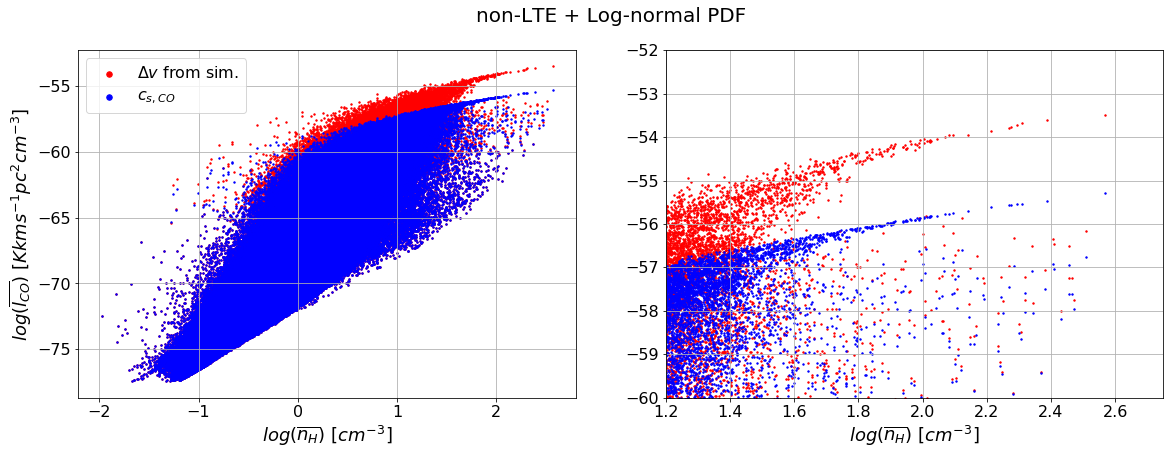

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax1.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_1), 
                      c="r", s=2, label = "$\Delta v$ from sim.")
ax2.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar_2), 
                      c="b", s=2, label = "$c_{s, CO}$")
ax1.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
ax1.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax2.set_xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
# ax2.set_ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2} cm^{-3}]$')
ax1.grid(b=True, which='both', axis='both') 
ax2.grid(b=True, which='both', axis='both')
ax2.set_xlim([1.20,2.75])
ax2.set_ylim([-60, -52])
# plt.setp(ax2.get_yticklabels(), visible=True)
legend = ax1.legend(loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
plt.subplots_adjust(wspace=0.18)
fig.suptitle("non-LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/debug_1.6/log(n_H_mean)vslog(l_CO)-sim.png', 
            dpi=300, bbox_inches='tight')

/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/snapshot/__init__.py:1443: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide
/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


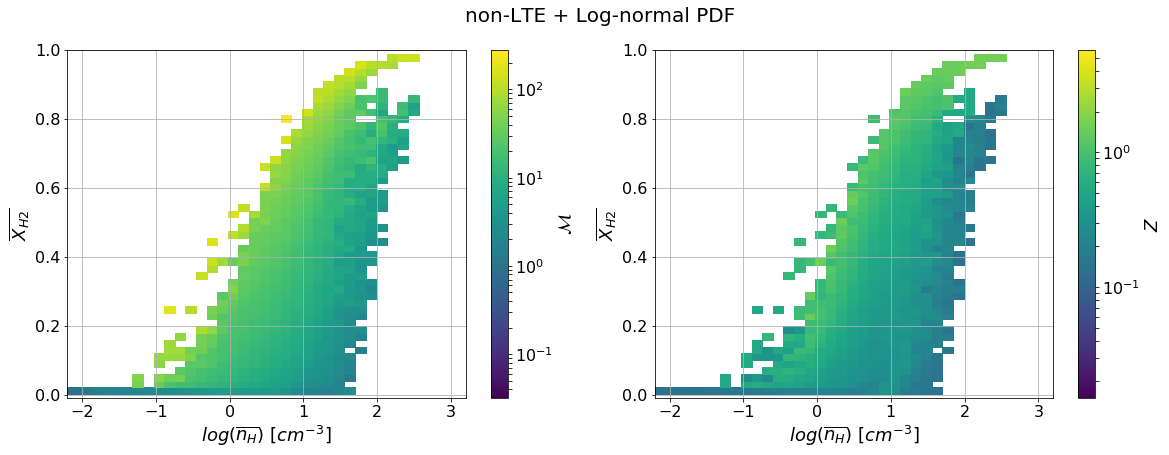

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])
yX_H2_M, xX_H2_M = yedges, xedges
im1 = ax1.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap='viridis')
ax1.set_ylim([-0.009,1.0])
ax1.set_xlim([-2.2, 3.2])
fig.colorbar(im1, ax=ax1, orientation='vertical', label='$\mathcal{M}$')
ax1.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax1.set_ylabel('$\overline{X_{H2}}$')
ax1.grid(b=True, which='both', axis='both')


histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])

yX_H2_Z, xX_H2_Z = yedges, xedges
im2 = ax2.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="viridis")
fig.colorbar(im2, ax=ax2, orientation='vertical', label='$Z$')
ax2.set_ylim([-0.009,1.0])
ax2.set_xlim([-2.2, 3.2])
ax2.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax2.set_ylabel('$\overline{X_{H2}}$')
ax2.grid(b=True, which='both', axis='both')

plt.subplots_adjust(wspace=0.18)
fig.suptitle("non-LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/debug_1.6/Hist-X_H2_bar-n_H_mean-MZ.png', 
            dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


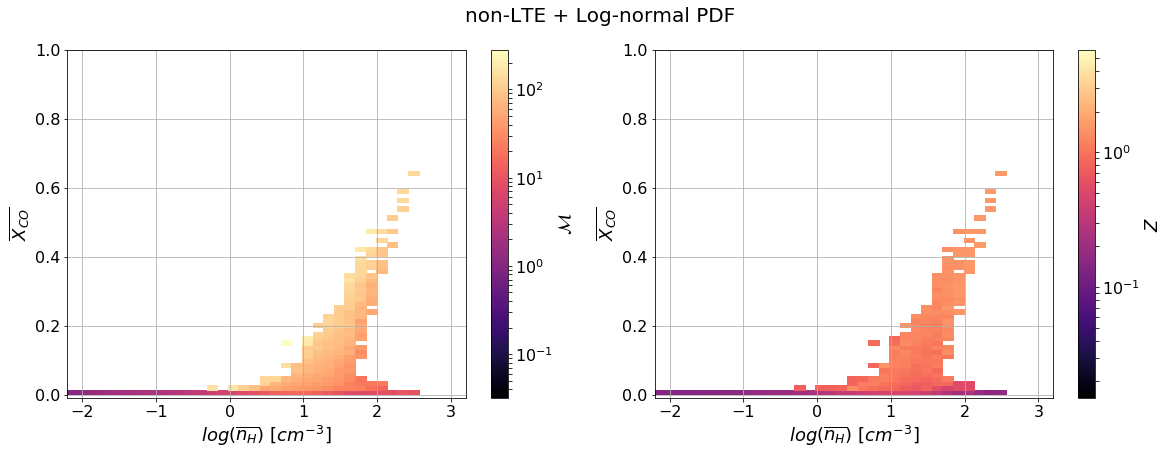

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout()
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])
yX_CO_M, xX_CO_M = yedges, xedges
im1 = ax1.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap="magma")
ax1.set_ylim([-0.009,1.0])
ax1.set_xlim([-2.2, 3.2])
fig.colorbar(im1, ax=ax1, orientation='vertical', label='$\mathcal{M}$')
ax1.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax1.set_ylabel('$\overline{X_{CO}}$')
ax1.grid(b=True, which='both', axis='both')


histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])

yX_CO_Z, xX_CO_Z = yedges, xedges
im2 = ax2.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="magma")
fig.colorbar(im2, ax=ax2, orientation='vertical', label='$Z$')
ax2.set_ylim([-0.009,1.0])
ax2.set_xlim([-2.2, 3.2])
ax2.set_xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
ax2.set_ylabel('$\overline{X_{CO}}$')
ax2.grid(b=True, which='both', axis='both')

plt.subplots_adjust(wspace=0.18)
fig.suptitle("non-LTE + Log-normal PDF", fontsize=20)
fig.subplots_adjust(top=0.88)
plt.savefig('outputs/debug_1.6/Hist-X_CO_bar-n_H_mean-MZ.png', 
            dpi=300, bbox_inches='tight')
plt.show()
